<a href="https://colab.research.google.com/github/hufsaim/T10402201/blob/master/notebook/Lab02_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def linreg(X, w, b):
    return torch.matmul(X,w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/batch_size
            param.grad.zero_()

In [3]:
d = pd.read_excel('data20240325.xlsx')
d[:5]

,수면,운동,공부,취미,기분
0,3,5,5,5,5
1,4,2,3,3,5
2,3,1,1,5,4
3,3,1,5,2,4
4,3,1,2,5,4


In [4]:
X = torch.tensor(d.iloc[:,:4].to_numpy()).to(torch.float32)
y = torch.tensor(d.iloc[:,4].to_numpy()).to(torch.float32)


X = X + 0.2*torch.randn(X.shape)
y = y + 0.2*torch.randn(y.shape)

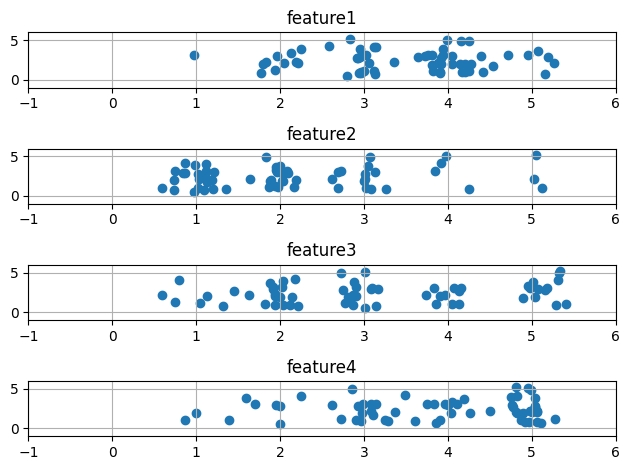

In [5]:
for xn in range(X.shape[-1]):
  plt.subplot(X.shape[-1],1,xn+1)
  plt.scatter(X[:,xn],y)
  plt.axis([-1,6,-1,6])
  plt.grid('on')
  plt.title(f'feature{xn+1}')
plt.tight_layout()
plt.show()

In [6]:
w = torch.tensor([1.,1,1,1],requires_grad = True)
b = torch.tensor([1.],requires_grad = True)

In [8]:
lr = 0.005
batch_size = 4
idx = np.arange(len(X))
loss_train = []
for j in np.arange(0,20):
  np.random.shuffle(idx)
  y_hat = linreg(X[idx[1:batch_size]],w,b)
  l = squared_loss(y_hat, y[idx[1:batch_size]])
  loss_train.append(l.sum().detach()/batch_size)
  l.sum().backward()
  sgd([w,b],lr,batch_size)

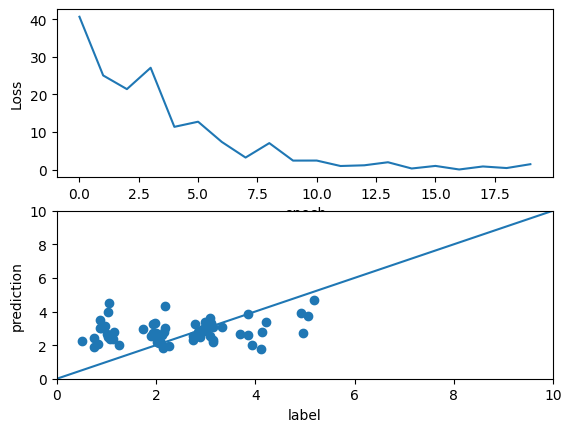

In [9]:
y_hat = linreg(X,w,b)
plt.subplot(211)
plt.plot(loss_train)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.subplot(212)
plt.scatter(y,y_hat.detach().numpy())
plt.plot(np.arange(0,11),np.arange(0,11))
plt.axis([0,10,0,10])
plt.xlabel('label')
plt.ylabel('prediction')
plt.show()

In [10]:
print(w,b)

tensor([ 0.1132,  0.4679,  0.2452, -0.0087], requires_grad=True) tensor([0.7389], requires_grad=True)
